In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
# Use matplotlib in notebook output
%matplotlib inline

In [3]:
# Create a dictionary of data
data = {
    "Height": [185,170,168,179,182,188,180,180,183,180,180,177,170,172,170,175,174,182,180,185],
    "Weight": [72,56,60,68,72,77,71,70,84,88,67,76,62,60,68,59,66,85,83,82],
}

# Create a DataFrame from the dictionary
dataset = pd.DataFrame(data)
dataset

,Height,Weight
0,185,72
1,170,56
2,168,60
3,179,68
4,182,72
5,188,77
6,180,71
7,180,70
8,183,84
9,180,88


In [4]:
print(dataset)
X = dataset.iloc[:, [0, 1]].values #X is two matrix of shape (200,2)
X


    Height  Weight
0      185      72
1      170      56
2      168      60
3      179      68
4      182      72
5      188      77
6      180      71
7      180      70
8      183      84
9      180      88
10     180      67
11     177      76
12     170      62
13     172      60
14     170      68
15     175      59
16     174      66
17     182      85
18     180      83
19     185      82


array([[185,  72],
       [170,  56],
       [168,  60],
       [179,  68],
       [182,  72],
       [188,  77],
       [180,  71],
       [180,  70],
       [183,  84],
       [180,  88],
       [180,  67],
       [177,  76],
       [170,  62],
       [172,  60],
       [170,  68],
       [175,  59],
       [174,  66],
       [182,  85],
       [180,  83],
       [185,  82]])

In [5]:
m=X.shape[0] #number of training examples
n=X.shape[1] #number of features. Here n=2
n_iter=20

In [6]:
K=3 # number of clusters

In [7]:
Centroids=np.array([]).reshape(n,0)
Centroids #Centroids is a n x K dimentional matrix, where each column will be a centroid for one cluster.

array([], shape=(2, 0), dtype=float64)

In [8]:
import random
for i in range(K):
    rand=random.randint(0,m-1)
    Centroids=np.c_[Centroids,X[rand]]
    Centroids

In [9]:
Output={}#initialize the dictionary

In [10]:
#We find the euclidian distance from each point to all the centroids and store in a m X K matrix.
#So every row in EuclidianDistance matrix will have distances of that particular data point from all the centroids.
#Next, we shall find the minimum distance and store the index of the column in a vector C
EuclidianDistance=np.array([]).reshape(m,0)
for k in range(K):
  tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
  EuclidianDistance=np.c_[EuclidianDistance,tempDist]
  C=np.argmin(EuclidianDistance,axis=1)+1

In [11]:
#regroup the data points based on the cluster index C and store in the Output dictionary
#and also compute the mean of separated clusters and assign it as new centroids
Y={}
for k in range(K):
    Y[k+1]=np.array([]).reshape(2,0)
for i in range(m):
    Y[C[i]]=np.c_[Y[C[i]],X[i]]

for k in range(K):
    Y[k+1]=Y[k+1].T

for k in range(K):
     Centroids[:,k]=np.mean(Y[k+1],axis=0)

In [12]:
for i in range(n_iter):
     #step 2.a
      EuclidianDistance=np.array([]).reshape(m,0)
      for k in range(K):
          tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
          EuclidianDistance=np.c_[EuclidianDistance,tempDist]
      C=np.argmin(EuclidianDistance,axis=1)+1
     #step 2.b
      Y={}
      for k in range(K):
          Y[k+1]=np.array([]).reshape(2,0)
      for i in range(m):
          Y[C[i]]=np.c_[Y[C[i]],X[i]]

      for k in range(K):
          Y[k+1]=Y[k+1].T

      for k in range(K):
          Centroids[:,k]=np.mean(Y[k+1],axis=0)
      Output=Y

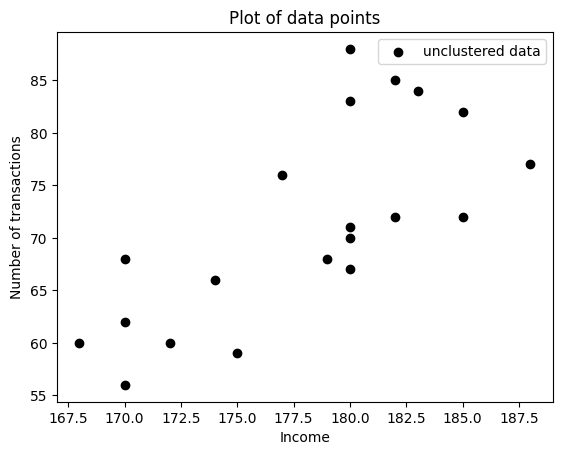

In [13]:
plt.scatter(X[:,0],X[:,1],c='black',label='unclustered data')
plt.xlabel('Income')
plt.ylabel('Number of transactions')
plt.legend()
plt.title('Plot of data points')
plt.show()

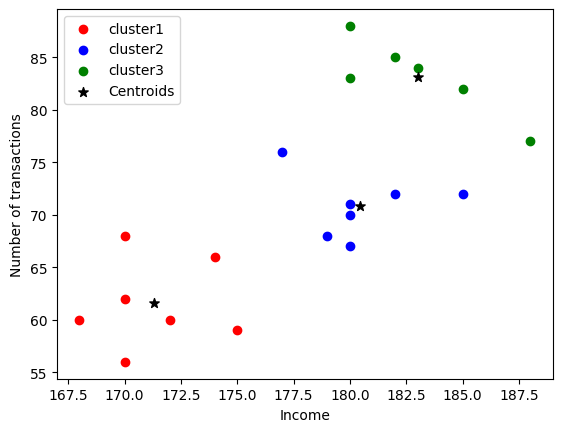

In [14]:
color=['red','blue','green','cyan','magenta']
labels=['cluster1','cluster2','cluster3']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=50,c='black',marker='*',label='Centroids')
plt.xlabel('Income')
plt.ylabel('Number of transactions')
plt.legend()
plt.show()